# **A. 개요**
선지희님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv


Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

`--> `반드시 들어가야하는 내용

1.   지역에 따라서 선호하는 게임 장르가 다른지
2.   연도별 게임의 트렌드가 있는지
3.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스

`--> `내가 분석하고싶은 내용


# **B. 데이터 수집 및 정제**

In [244]:
from google.colab import files

uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [245]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [302]:
data = pd.read_csv("vgames2.csv")
data

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [303]:
#데이터를 읽고 불필요한 데이터인 Unnamed 제거
data = pd.read_csv("vgames2.csv")
df = data.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [247]:
df.loc[df['Publisher']=='Unknown']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0,0,0
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
212,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0,0
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
387,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
...,...,...,...,...,...,...,...,...,...
16400,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0,0.08,0.01
16402,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [248]:
df.loc[df['Platform']=='X360']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
23,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0,0.01,0,0
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
32,Project Sylpheed: Arc of Deception,X360,2006.0,Shooter,Microsoft Game Studios,0.12,0.01,0.02,0.01
44,Crysis 3,X360,2013.0,Shooter,Electronic Arts,0.51,0.33,0.01,0.08
49,Dreamworks Madagascar Kartz,X360,2009.0,Racing,Activision,0.14,0.09,0,0.02
...,...,...,...,...,...,...,...,...,...
16502,Metal Gear Solid V: Ground Zeroes,X360,2014.0,Action,Konami Digital Entertainment,0.07,0.06,0.01,0.01
16509,FIFA World Cup Germany 2006,X360,2006.0,Sports,Electronic Arts,0.19,0.27,0.01,0
16524,Rapala Fishing Frenzy 2009,X360,2008.0,Sports,Activision,0.04,0,0,0
16532,Karaoke Revolution Glee: Volume 3,X360,2011.0,Misc,Konami Digital Entertainment,0.13,0,0,0.01


In [249]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [250]:
# 결측치 확인
# 이 과정에서 결측치들을 모두 drop 하고 싶지만 어떤걸 분석하느냐에 따라 필요한 자료를 결측치로 
# 잃게될 수 있으니 각 분석에서 필요없는 값들을 그 분석을 할 때에만 drop 하도록 한다.
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [251]:
df.duplicated().sum()

1

In [252]:
df.Year.min()

0.0

In [253]:
# df["A"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
# regex=True키 문자열을 값 문자열로 교체하려는 경우 필요합니다.
# 다음을 사용하여 각 값을 수학적으로 평가합니다 map(pd.eval).
# 여기서 Series의 방법은 각 값에 방법을 map(~)적용 합니다.pd.eval(~).
# 마지막으로 다음을 사용하여 모든 값을 float 으로 변환합니다 astype(float).
df['NA_Sales'] = df['NA_Sales'].replace({"K":"*1e-3", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({"K":"*1e-3", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({"K":"*1e-3", "M":"*1"}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*1e-3", "M":"*1"}, regex=True).map(pd.eval).astype(float)

In [254]:
#JP_Sales 값이 260K 였는데 K가 사라지고, 크기 통일이 되었는지 확인
df_ilo = df.loc[df['Name'] == 'Virtua Racing']
df_ilo

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9995,Virtua Racing,GEN,1994.0,Racing,Sega,0.0,0.0,0.26,0.0


In [255]:
#JP_Sales 값이 0.11M 이었는데 M이 사라졌는지 확인
df_il = df.loc[df['Name'] == 'Virtua Fighter CG Portrait Series Vol.1: Sarah Bryant']
df_il

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8992,Virtua Fighter CG Portrait Series Vol.1: Sarah...,SAT,1995.0,Misc,Sega,0.0,0.0,0.11,0.0


# **1. 지역에 따라서 선호하는 게임 장르가 다른지**

지역에 따라서 선호하는 게임 장르가 다른지 알아보기 위해 필요한 데이터만 추출 후 장르별로 묶어 그래프로 시각화 하여 비교해본다.

## 1)데이터 추출

In [256]:
# 필요한 데이터만 추출하여 1번 분석에 사용한다
df_g = df.loc[:,['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_g

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


In [257]:
# 장르 결측치 제거
df_g = df_g.dropna(axis=0)
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16548 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        16548 non-null  object 
 1   NA_Sales     16548 non-null  float64
 2   EU_Sales     16548 non-null  float64
 3   JP_Sales     16548 non-null  float64
 4   Other_Sales  16548 non-null  float64
dtypes: float64(4), object(1)
memory usage: 775.7+ KB


In [258]:
# 결측치가 제거되었는지 확인
df_g.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

## 2)데이터 그룹화

In [259]:
# 장르끼리 그룹을 묶고, 장르의 국가별 판매량 총 합을 구한다.
df_G = df_g.groupby(df_g.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
df_G

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


## 3) 그룹화한 데이터 순위 매기기

In [305]:
# 각 장르에 대한 국가별 판매량의 합계를 보면 가장 인기있는 장르부터 순서는
# Action > Sports > Shooter> Role-Playing > Platform > Misc > Racing > Fighting > Simulation > Puzzle > Adventure > Strategy
# 순서임을 알 수 있다. 

df_Ge = df_G.copy()
df_s = df_G.sum(axis=1)
df_Ge['Sales'] = df_s
df_Ge.loc[:, '전체순위'] = df_Ge.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Ge.loc[:, '북미순위'] = df_Ge.loc[:, 'NA_Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Ge.loc[:, '유럽순위'] = df_Ge.loc[:, 'EU_Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Ge.loc[:, '일본순위'] = df_Ge.loc[:, 'JP_Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Ge.loc[:, '이외 국가 순위'] = df_Ge.loc[:, 'Other_Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Ge

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales,전체순위,북미순위,유럽순위,일본순위,이외 국가 순위
Genre,,,,,,,,,,
Action,874.81,522.16,157.90,186.45,1741.32,1,1,1,2,1
Adventure,105.66,64.05,51.95,16.81,238.47,11,11,10,10,10
Fighting,223.20,101.22,87.34,36.64,448.40,8,8,9,6,8
Misc,408.05,212.36,105.27,74.04,799.72,6,5,5,5,5
Platform,446.44,201.61,130.65,51.53,830.23,5,4,6,4,7
Puzzle,123.35,50.73,56.87,12.52,243.47,10,10,11,8,11
Racing,357.19,237.10,56.40,77.10,727.79,7,6,4,9,4
Role-Playing,319.54,183.58,344.95,56.96,905.03,4,7,7,1,6
Shooter,581.92,313.05,38.28,102.65,1035.90,3,3,3,12,3


### 3-1) 그룹화한 데이터 시각화하여 비교

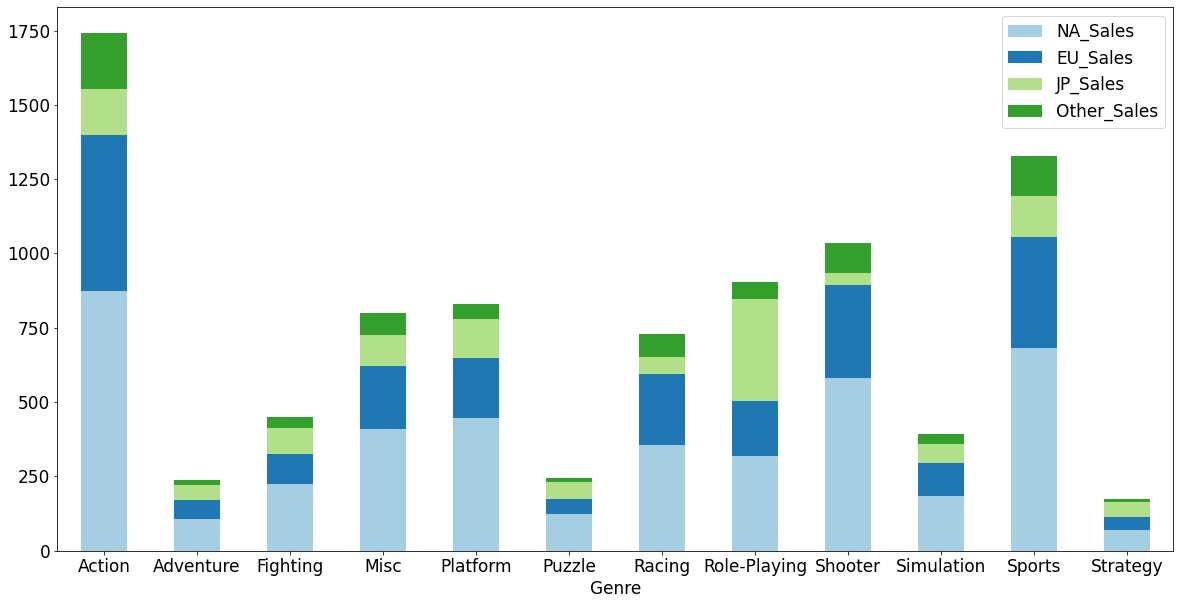

In [261]:
# 위의 표에서 볼 수 있는 순서를 그래프를 통해 더욱더 보기 쉽게 나타내었다.

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20,10)

df_G.plot.bar(stacked=True, rot=0)
plt.xticks(rotation=0)
plt.show()

### 3-2)그룹화한 데이터 지역별로 순위를 매긴 차트 생성

In [262]:
# 대부분의 국가에서 선호하는 장르가 비슷하지만, 일본에서만 순위가 큰 차이를 보임을 알 수 있다.
# 북미, 유럽, 이외 국가에서는 전체순위에서의 장르 순서와 같이 Action > Sports > Shooter 장르가 상위권을 차지하고 있고
# 일본에서만 Role-Playing > Action > Sports 순서로 선호하는 장르가 나타난다.

# 일본에서 1위인 Role-Playing만 제외하고 본다면 전체적으로 Action, Sports 장르를 선호함을 알 수 있습니다.

df_Ge.iloc[:,5: ]

,전체순위,북미순위,유럽순위,일본순위,이외 국가 순위
Genre,,,,,
Action,1,1,1,2,1
Adventure,11,11,10,10,10
Fighting,8,8,9,6,8
Misc,6,5,5,5,5
Platform,5,4,6,4,7
Puzzle,10,10,11,8,11
Racing,7,6,4,9,4
Role-Playing,4,7,7,1,6
Shooter,3,3,3,12,3


### 3-3) 그룹화한 데이터 지역별 선호도 그래프 시각화

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

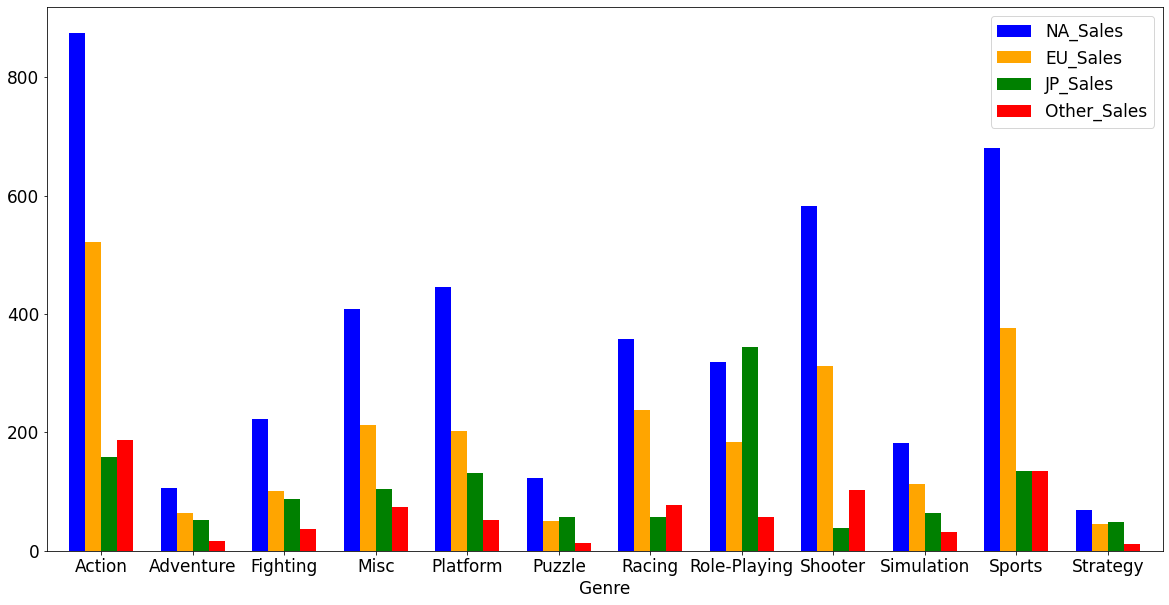

In [263]:
# 지역에 따라서 선호하는 장르가 다른지

df_G.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['blue', 'orange', 'green', 'red'])
plt.xticks(rotation=0)

## >1번 결론



---

북미, 유럽, 이외 국가에서는 Action > Sports > Shooter 장르가 상위권을 차지하고 있고,
일본에서만 Role-Playing > Action > Sports 순서로 선호하는 장르가 나타납니다.

일본에서 1위인 Role-Playing만 제외하고 본다면 전체적으로 Action, Sports 장르를 선호함을 알 수 있습니다.위의 결과들을 토대로 ***지역에 따라서 선호하는 게임 장르가 비슷다***고 할 수 있습니다.


---


# **2. 연도별 게임의 트렌드가 있는지**

## 1) 2번을 분석하기 위한 데이터 추출

In [264]:
# 필요한 데이터만 추출하여 1번 분석에 사용한다
df_y = df.loc[:,['Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_y['Sales'] = df_y['NA_Sales']+  df_y['EU_Sales'] + df_y['JP_Sales'] + df_y['Other_Sales']
df_y

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,DS,2008.0,Action,0.04,0.00,0.00,0.00,0.04
1,Wii,2009.0,Action,0.17,0.00,0.00,0.01,0.18
2,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,0.02
3,DS,2010.0,Misc,0.04,0.00,0.00,0.00,0.04
4,PS3,2010.0,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...
16593,GC,2006.0,Platform,0.15,0.04,0.00,0.01,0.20
16594,PSP,2005.0,Action,0.01,0.00,0.00,0.00,0.01
16595,PS3,2015.0,Sports,0.44,0.19,0.03,0.13,0.79
16596,PSV,2013.0,Action,0.05,0.05,0.25,0.03,0.38


In [265]:
# 맨 위에서 확인한 Year에서 271개, Genre에서 50개의 결측치를 제거한다.
df_y = df_y.dropna(axis=0)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Platform     16277 non-null  object 
 1   Year         16277 non-null  float64
 2   Genre        16277 non-null  object 
 3   NA_Sales     16277 non-null  float64
 4   EU_Sales     16277 non-null  float64
 5   JP_Sales     16277 non-null  float64
 6   Other_Sales  16277 non-null  float64
 7   Sales        16277 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.1+ MB


In [266]:
# 연도에 적혀있는 소수점 이하를 지우고 뒤에 두자리수만 남긴다.
# object로 변환이 되기 떄문에 int로 데이터 타입을 변환해준다.
# 여기서 문제는 nan 값을 0n으로 변환하게 되어 결측치로 인식하지 못함 따라서 0n을 drop하도록 코드를 짜야한다.
# 위의 문제는 이 과정 전에 결측치를 제거함으로써 해결이 되었다.
df_y.Year = df_y.Year.astype(str).str[:-2].str.pad(4, fillchar='0')
df_y.Year = df_y.Year.astype(str).str[2:4].astype(int)
df_y

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,DS,8,Action,0.04,0.00,0.00,0.00,0.04
1,Wii,9,Action,0.17,0.00,0.00,0.01,0.18
2,PSP,10,Adventure,0.00,0.00,0.02,0.00,0.02
3,DS,10,Misc,0.04,0.00,0.00,0.00,0.04
4,PS3,10,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...
16593,GC,6,Platform,0.15,0.04,0.00,0.01,0.20
16594,PSP,5,Action,0.01,0.00,0.00,0.00,0.01
16595,PS3,15,Sports,0.44,0.19,0.03,0.13,0.79
16596,PSV,13,Action,0.05,0.05,0.25,0.03,0.38


In [267]:
# 이번 분석에서 필요한 데이터인 플랫폼, 년도, 장르, 판매량만 사용한다.
df_Y = df_y.loc[:,['Platform', 'Year', 'Genre', 'Sales']]
df_Y

,Platform,Year,Genre,Sales
0,DS,8,Action,0.04
1,Wii,9,Action,0.18
2,PSP,10,Adventure,0.02
3,DS,10,Misc,0.04
4,PS3,10,Platform,0.25
...,...,...,...,...
16593,GC,6,Platform,0.20
16594,PSP,5,Action,0.01
16595,PS3,15,Sports,0.79
16596,PSV,13,Action,0.38


## 2) 연도 분포 확인 및 10년 단위로 묶기

In [268]:
# 연도 분포가 어떻게 되어있는지 확인한다.
df_Y['Year'].unique()

array([ 8,  9, 10,  5, 11,  7,  1,  3,  6, 14, 15,  2, 97, 13, 96,  4,  0,
       84, 98, 16, 85, 99, 95, 93, 12, 87, 82, 94, 90, 92, 91, 83, 88, 81,
       89, 86, 17, 80, 20])

In [269]:
# 연도별 게임 트랜드를 확인하기 위해 10년 단위로 표현해준다.
def df_Y_10Years(Years):
  if 80 <= Years < 90:
    return '80~89'
  if 90 <= Years <= 99:
    return '90~99'
  if 00 <= Years < 10:
    return '00~09'
  if 10 <= Years <= 20:
    return '10~20'
df_Y['Years'] = [df_Y_10Years(i) for i in df_Y.Year]
df_Y

,Platform,Year,Genre,Sales,Years
0,DS,8,Action,0.04,00~09
1,Wii,9,Action,0.18,00~09
2,PSP,10,Adventure,0.02,10~20
3,DS,10,Misc,0.04,10~20
4,PS3,10,Platform,0.25,10~20
...,...,...,...,...,...
16593,GC,6,Platform,0.20,00~09
16594,PSP,5,Action,0.01,00~09
16595,PS3,15,Sports,0.79,10~20
16596,PSV,13,Action,0.38,10~20


## 3) 연도별 플랫폼 순위, 장르 순위를 판매량을 통해 확인

In [270]:
# 80년대 플랫폼 순위를 판매량을 통해 확인한다.
df_Yp80 = df_Y.loc[:,['Platform','Sales','Years']]
df_Yp80 = df_Y.loc[df_Y['Years']=='80~89']
df_Yp80 = df_Yp80.groupby(['Platform','Years'], as_index = False)['Sales'].sum()
df_Yp80.loc[:, '80Platform'] = df_Yp80.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yp80 = df_Yp80.rename(columns = {df_Yp80.columns[2] : '80Sales'})
df_Yp80 = df_Yp80.head()
display(df_Yp80)

# 80년대 장르 순위를 판매량을 통해 확인한다.
df_Yg80 = df_Y.loc[:,['Genre','Sales','Years']]
df_Yg80 = df_Y.loc[df_Y['Years']=='80~89']
df_Yg80 = df_Yg80.groupby(['Genre','Years'], as_index = False)['Sales'].sum()
df_Yg80.loc[:, '80Platform'] = df_Yg80.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yg80 = df_Yg80.rename(columns = {df_Yg80.columns[2] : '80Sales'})
display(df_Yg80)


,Platform,Years,80Sales,80Platform
0,2600,80~89,85.98,2
1,DS,80~89,0.02,5
2,GB,80~89,66.40,3
3,NES,80~89,223.51,1
4,PC,80~89,0.07,4


,Genre,Years,80Sales,80Platform
0,Action,80~89,51.10,4
1,Adventure,80~89,4.78,10
2,Fighting,80~89,7.24,9
3,Misc,80~89,8.44,8
4,Platform,80~89,122.26,1
5,Puzzle,80~89,62.75,2
6,Racing,80~89,12.10,7
7,Role-Playing,80~89,15.25,6
8,Shooter,80~89,59.77,3
9,Simulation,80~89,0.51,11


In [271]:
# 90년대 플랫폼 순위를 판매량을 통해 확인한다.
df_Yp90 = df_Y.loc[:,['Platform','Sales','Years']]
df_Yp90 = df_Y.loc[df_Y['Years']=='90~99']
df_Yp90 = df_Yp90.groupby(['Platform','Years'], as_index = False)['Sales'].sum()
df_Yp90.loc[:, '90Platform'] = df_Yp90.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yp90 = df_Yp90.rename(columns = {df_Yp90.columns[2] : '90Sales'})
df_Yp90 = df_Yp90.head()
display(df_Yp90)

# 90년대 장르 순위를 판매량을 통해 확인한다.
df_Yg90 = df_Y.loc[:,['Genre','Sales','Years']]
df_Yg90 = df_Y.loc[df_Y['Years']=='90~99']
df_Yg90 = df_Yg90.groupby(['Genre','Years'], as_index = False)['Sales'].sum()
df_Yg90.loc[:, '90Platform'] = df_Yg90.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yg90 = df_Yg90.rename(columns = {df_Yg90.columns[2] : '90Sales'})
display(df_Yg90)

# GB, GG는 psp 구버전 같은 게임기	

,Platform,Years,90Sales,90Platform
0,3DO,90~99,0.10,14
1,DC,90~99,8.54,9
2,GB,90~99,159.03,4
3,GEN,90~99,28.35,7
4,GG,90~99,0.04,15


,Genre,Years,90Sales,90Platform
0,Action,90~99,139.15,5
1,Adventure,90~99,44.80,11
2,Fighting,90~99,123.51,6
3,Misc,90~99,63.43,8
4,Platform,90~99,208.87,1
5,Puzzle,90~99,38.94,12
6,Racing,90~99,148.81,3
7,Role-Playing,90~99,182.77,2
8,Shooter,90~99,68.89,7
9,Simulation,90~99,52.04,10


In [272]:
# 00년대 플랫폼 순위를 판매량을 통해 확인한다.
df_Yp00 = df_Y.loc[:,['Platform','Sales','Years']]
df_Yp00 = df_Y.loc[df_Y['Years']=='00~09']
df_Yp00 = df_Yp00.groupby(['Platform','Years'], as_index = False)['Sales'].sum()
df_Yp00.loc[:, '00Platform'] = df_Yp00.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yp00 = df_Yp00.rename(columns = {df_Yp00.columns[2] : '00Sales'})
df_Yp00 = df_Yp00.head()
display(df_Yp00)

# 00년대 장르 순위를 판매량을 통해 확인한다.
df_Yg00 = df_Y.loc[:,['Genre','Sales','Years']]
df_Yg00 = df_Y.loc[df_Y['Years']=='00~09']
df_Yg00 = df_Yg00.groupby(['Genre','Years'], as_index = False)['Sales'].sum()
df_Yg00.loc[:, '00Platform'] = df_Yg00.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yg00 = df_Yg00.rename(columns = {df_Yg00.columns[2] : '00Sales'})
display(df_Yg00)

,Platform,Years,00Sales,00Platform
0,DC,00~09,7.41,14
1,DS,00~09,687.57,2
2,GB,00~09,29.00,13
3,GBA,00~09,312.65,6
4,GC,00~09,196.02,9


,Genre,Years,00Sales,00Platform
0,Action,00~09,853.13,1
1,Adventure,00~09,123.77,10
2,Fighting,00~09,231.26,9
3,Misc,00~09,486.24,3
4,Platform,00~09,376.13,7
5,Puzzle,00~09,117.86,11
6,Racing,00~09,438.00,4
7,Role-Playing,00~09,412.20,6
8,Shooter,00~09,433.45,5
9,Simulation,00~09,265.64,8


In [273]:
# 10년대 플랫폼 순위를 판매량을 통해 확인한다.
df_Yp10 = df_Y.loc[:,['Platform','Sales','Years']]
df_Yp10 = df_Y.loc[df_Y['Years']=='10~20']
df_Yp10 = df_Yp10.groupby(['Platform','Years'], as_index = False)['Sales'].sum()
df_Yp10.loc[:, '10Platform'] = df_Yp10.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yp10 = df_Yp10.rename(columns = {df_Yp10.columns[2] : '10Sales'})
df_Yp10 = df_Yp10.head()
display(df_Yp10)

# 10년대 장르 순위를 판매량을 통해 확인한다.
df_Yg10 = df_Y.loc[:,['Genre','Sales','Years']]
df_Yg10 = df_Y.loc[df_Y['Years']=='10~20']
df_Yg10 = df_Yg10.groupby(['Genre','Years'], as_index = False)['Sales'].sum()
df_Yg10.loc[:, '10Platform'] = df_Yg10.loc[:, 'Sales'].rank(axis=0, method='max', ascending=False).astype(str).str[:-2]
df_Yg10 = df_Yg10.rename(columns = {df_Yg10.columns[2] : '10Sales'})
display(df_Yg10)

# X360, Xone은 조이스틱이 있는 게임
# ps는 플스

,Platform,Years,10Sales,10Platform
0,3DS,10~20,231.83,4
1,DS,10~20,129.65,7
2,PC,10~20,119.83,8
3,PS2,10~20,5.57,12
4,PS3,10~20,601.19,1


,Genre,Years,10Sales,10Platform
0,Action,10~20,669.64,1
1,Adventure,10~20,60.87,10
2,Fighting,10~20,81.53,8
3,Misc,10~20,229.30,5
4,Platform,10~20,120.75,7
5,Puzzle,10~20,21.19,12
6,Racing,10~20,123.65,6
7,Role-Playing,10~20,291.30,4
8,Shooter,10~20,462.64,2
9,Simulation,10~20,71.27,9


## 4) 연도별 플랫폼 순위 및 장르 순위 시각화

In [274]:
import matplotlib.pyplot as plt
import numpy as np

df_YP80 = df_Yp80.loc[:,['Platform', '80Sales']]
df_YP90 = df_Yp90.loc[:,['Platform', '90Sales']]
df_YP00 = df_Yp00.loc[:,['Platform', '00Sales']]
df_YP10 = df_Yp10.loc[:,['Platform', '10Sales']]
df_YP = df_YP80.merge(df_YP90, how = "outer", on = ['Platform'])
df_YP = df_YP.merge(df_YP00, how = "outer", on = ['Platform'])
df_YP = df_YP.merge(df_YP10, how = "outer", on = ['Platform'])
df_YP.set_index('Platform', inplace=True)
df_YP
#df_YPT

,80Sales,90Sales,00Sales,10Sales
Platform,,,,
2600,85.98,NaN,NaN,NaN
DS,0.02,NaN,687.57,129.65
GB,66.40,159.03,29.00,NaN
NES,223.51,NaN,NaN,NaN
PC,0.07,NaN,NaN,119.83
3DO,NaN,0.10,NaN,NaN
DC,NaN,8.54,7.41,NaN
GEN,NaN,28.35,NaN,NaN
GG,NaN,0.04,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

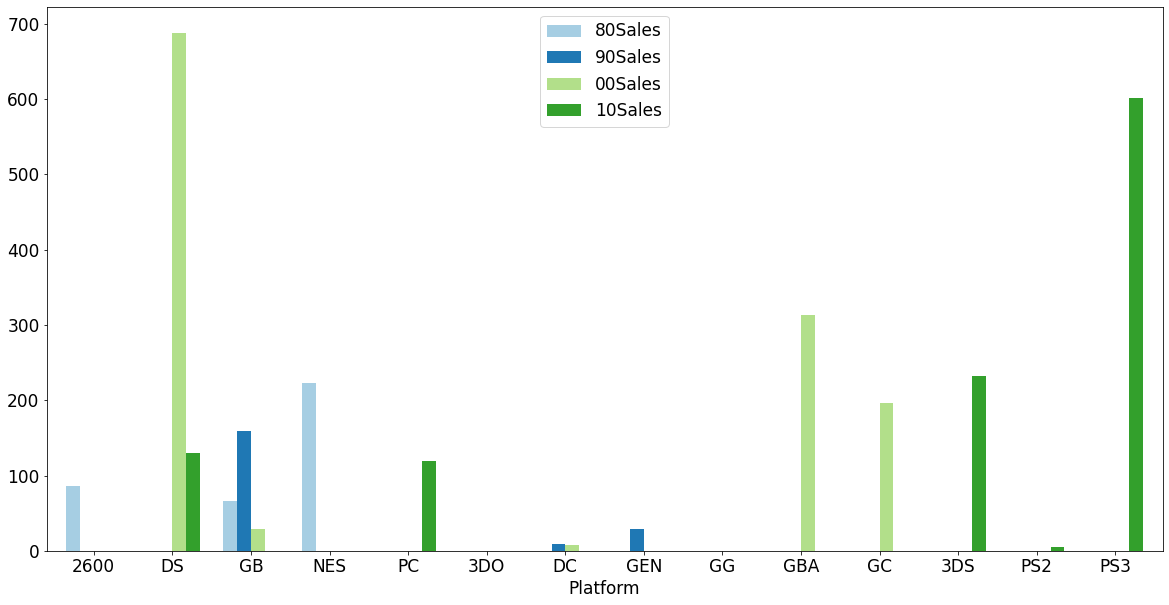

In [275]:
sns.set_palette("Paired")
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20,10)
df_YP.plot(kind='bar', width=0.7)
plt.xticks(rotation=0)

In [276]:
df_YG80 = df_Yg80.loc[:,['Genre', '80Sales']]
df_YG90 = df_Yg90.loc[:,['Genre', '90Sales']]
df_YG00 = df_Yg00.loc[:,['Genre', '00Sales']]
df_YG10 = df_Yg10.loc[:,['Genre', '10Sales']]
df_YG = df_YG80.merge(df_YG90, how='left', on = ['Genre'])
df_YG = df_YG.merge(df_YG00, how='left', on = ['Genre'])
df_YG = df_YG.merge(df_YG10, how='left', on = ['Genre'])
df_YG.set_index('Genre', inplace=True)
df_YG = df_YG.astype(int)
df_YG = df_YG.sort_values(by=['10Sales'], ascending=False)
df_YG

,80Sales,90Sales,00Sales,10Sales
Genre,,,,
Action,51,139,853,669
Shooter,59,68,433,462
Sports,31,146,802,324
Role-Playing,15,182,412,291
Misc,8,63,486,229
Racing,12,148,438,123
Platform,122,208,376,120
Fighting,7,123,231,81
Simulation,0,52,265,71


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

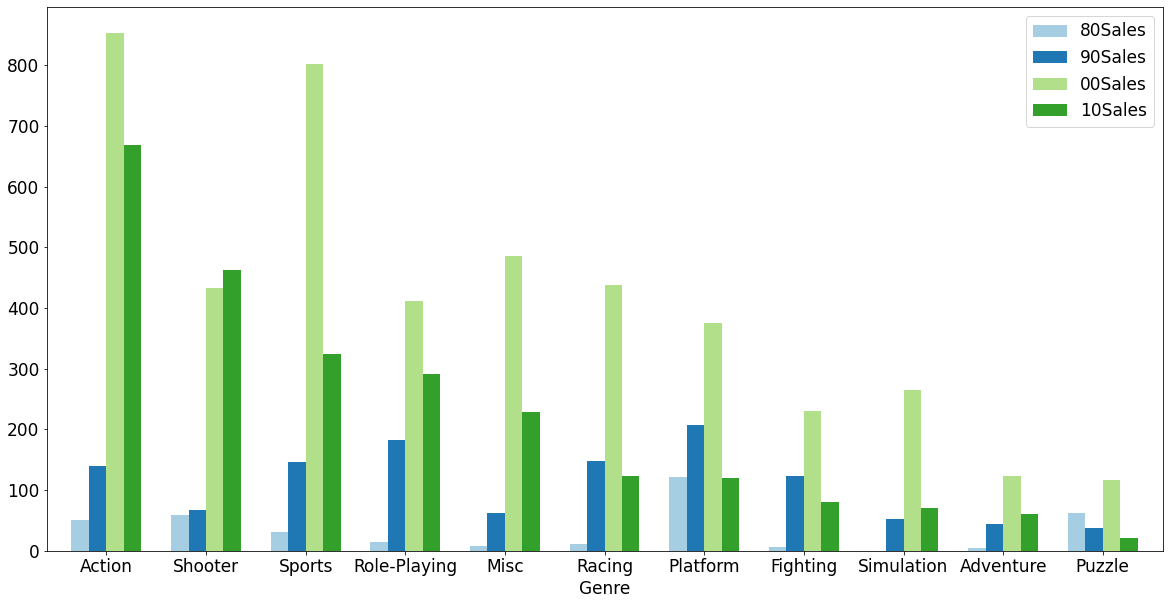

In [277]:
sns.set_palette("Paired")
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20,10)
df_YG.plot(kind='bar', width=0.7)
plt.xticks(rotation=0)

*   플랫폼 시각화 결과를 토대로 80년대에 인기 있었던 플랫폼들은 현재는 인기가 없음을 알 수 있고 00년-20년에는 DS, PS3 등과 같은 플랫폼이 엄청난 인기를 끌고 있음을 알 수 있다.
*   장르 시각화 결과를 토대로 80-90년대에 인기있는 장르는 Platform,Puzzle, Racing 이고,00-20년대 인기있는 장르는 Action, Sports, Shooter 임을 알 수 있다. 이처럼 80-90년대와 00-20년대 인기있는 장르 순위는 달라졌음을 알 수 있다.

따라서 **연도별 게임의 플랫폼 및 장르에 트렌드가 있음**을 알 수 있다.







# **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

출고량이 높은 게임에 대한 분석 및 시각화를 진행하는 이유는 다음 분기에 어떤 게임을 설계해야 할까 라는 질문에 대한 해답을 찾기 위함이기 

때문에 최근 10년동안의 자료를 바탕으로 시각화를 한다.

In [278]:
df_Y10 = df_Y.loc[df_Y['Years']=='10~20']
df_Y10

,Platform,Year,Genre,Sales,Years
2,PSP,10,Adventure,0.02,10~20
3,DS,10,Misc,0.04,10~20
4,PS3,10,Platform,0.25,10~20
6,PC,11,Simulation,0.03,10~20
9,PS3,11,Action,0.08,10~20
...,...,...,...,...,...
16581,XOne,14,Action,0.27,10~20
16588,PS3,11,Shooter,0.18,10~20
16590,PS3,10,Adventure,0.05,10~20
16595,PS3,15,Sports,0.79,10~20


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

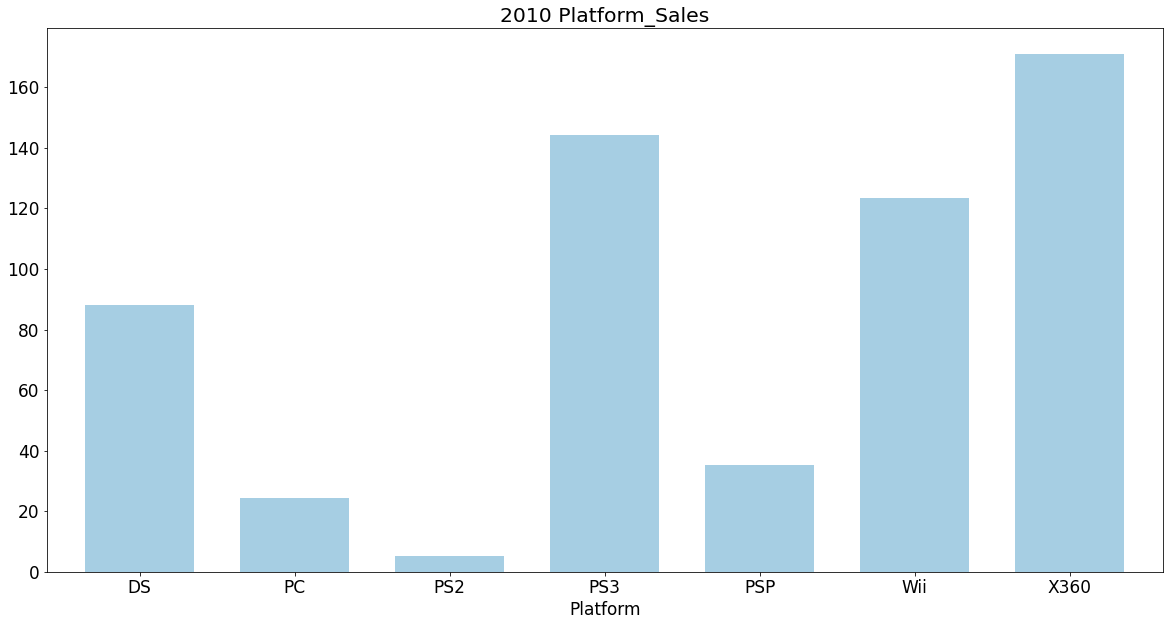

In [279]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (20,10)
df_y10 = df_Y10.loc[df_Y10['Year']==10]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010 Platform_Sales')  
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

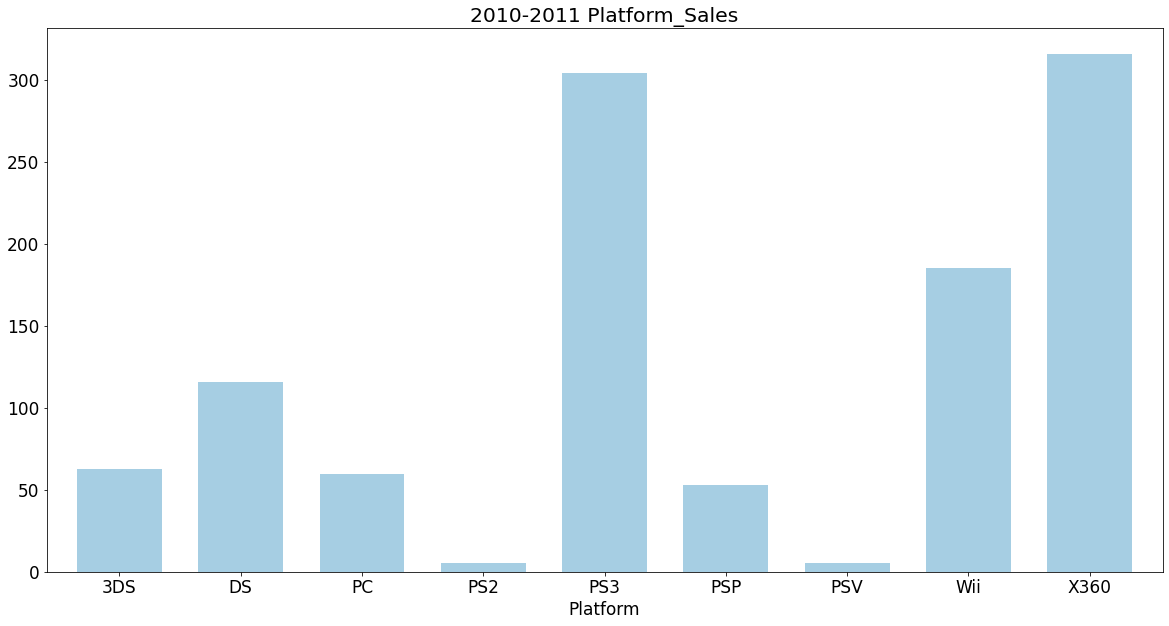

In [280]:
df_y10 = df_Y10.loc[df_Y10['Year']<=11]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2011 Platform_Sales')  
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

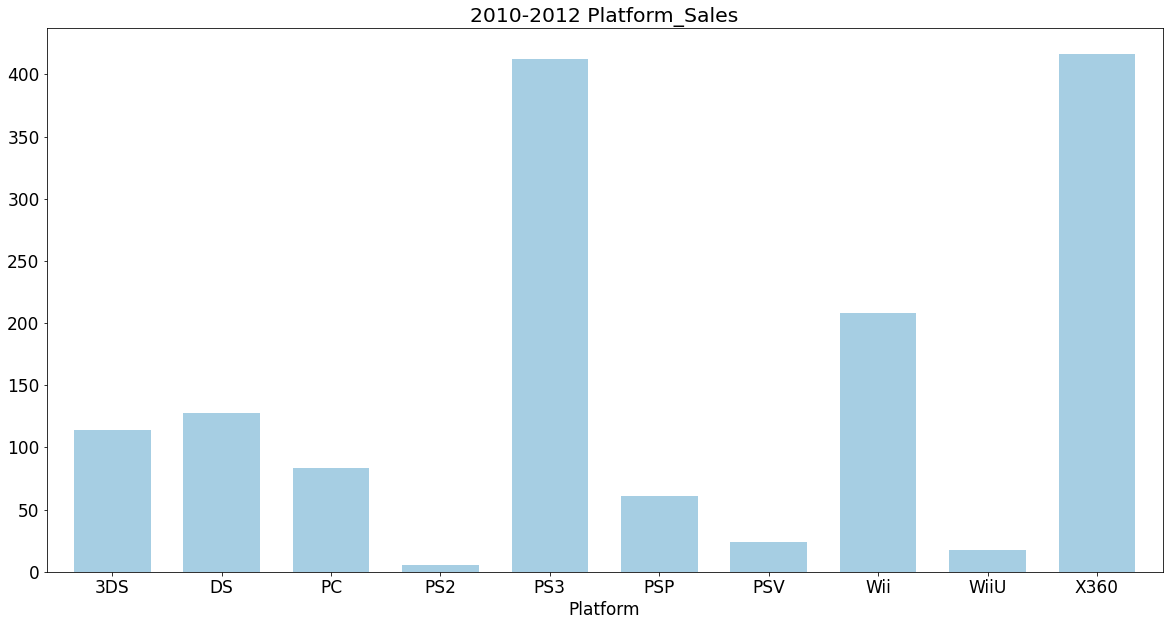

In [281]:
df_y10 = df_Y10.loc[df_Y10['Year']<=12]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2012 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

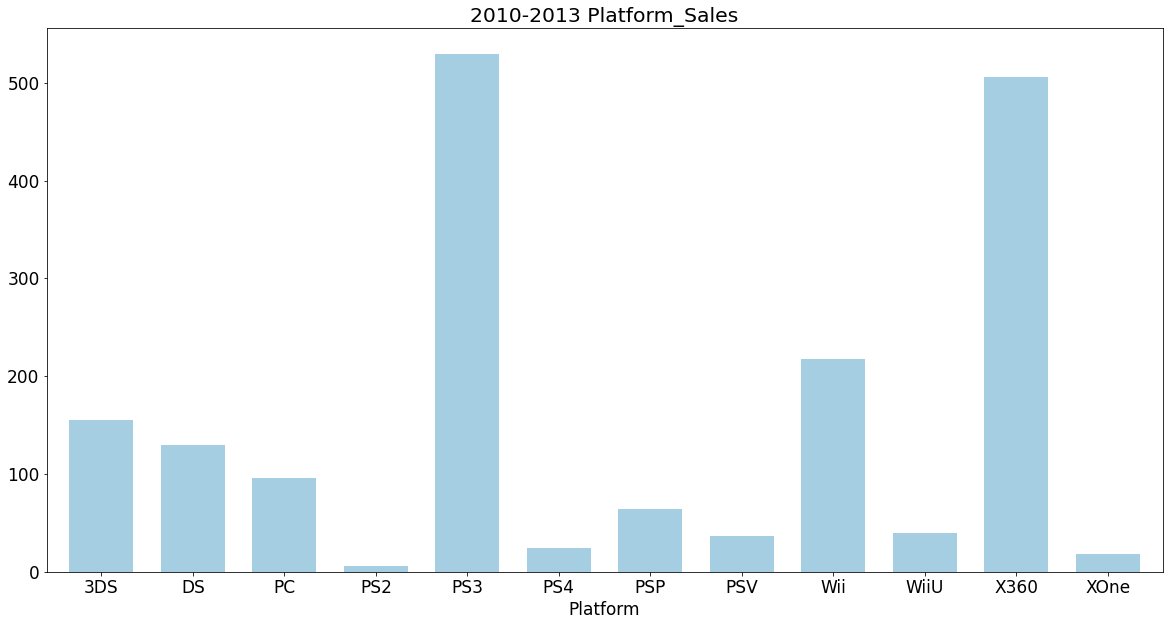

In [282]:
df_y10 = df_Y10.loc[df_Y10['Year']<=13]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2013 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

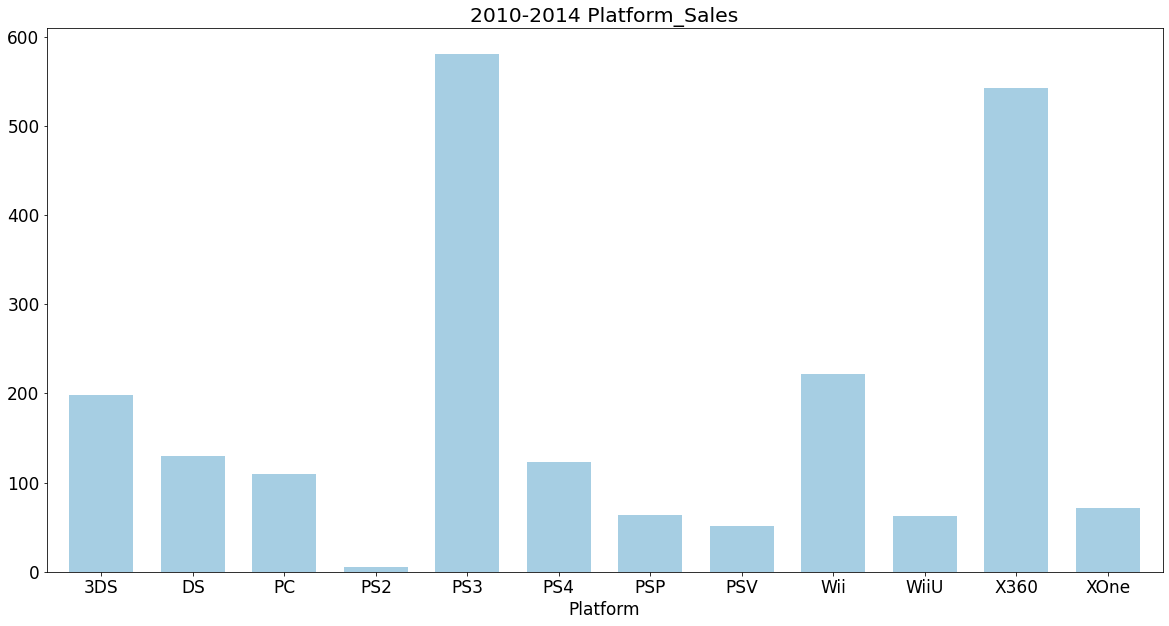

In [283]:
df_y10 = df_Y10.loc[df_Y10['Year']<=14]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2014 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

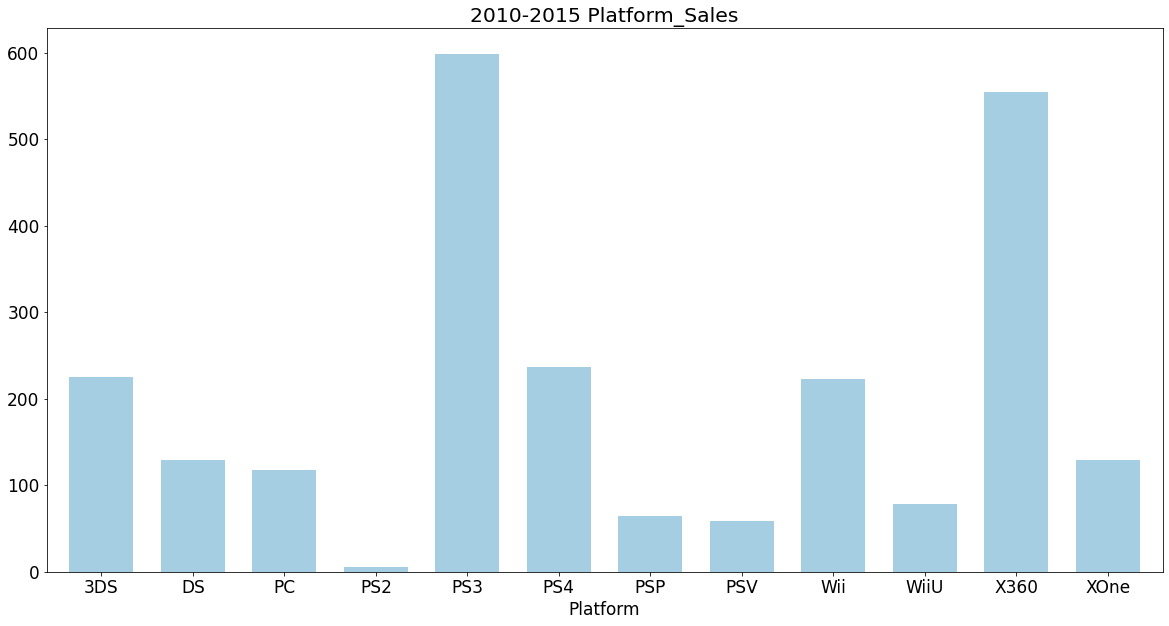

In [284]:
df_y10 = df_Y10.loc[df_Y10['Year']<=15]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2015 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

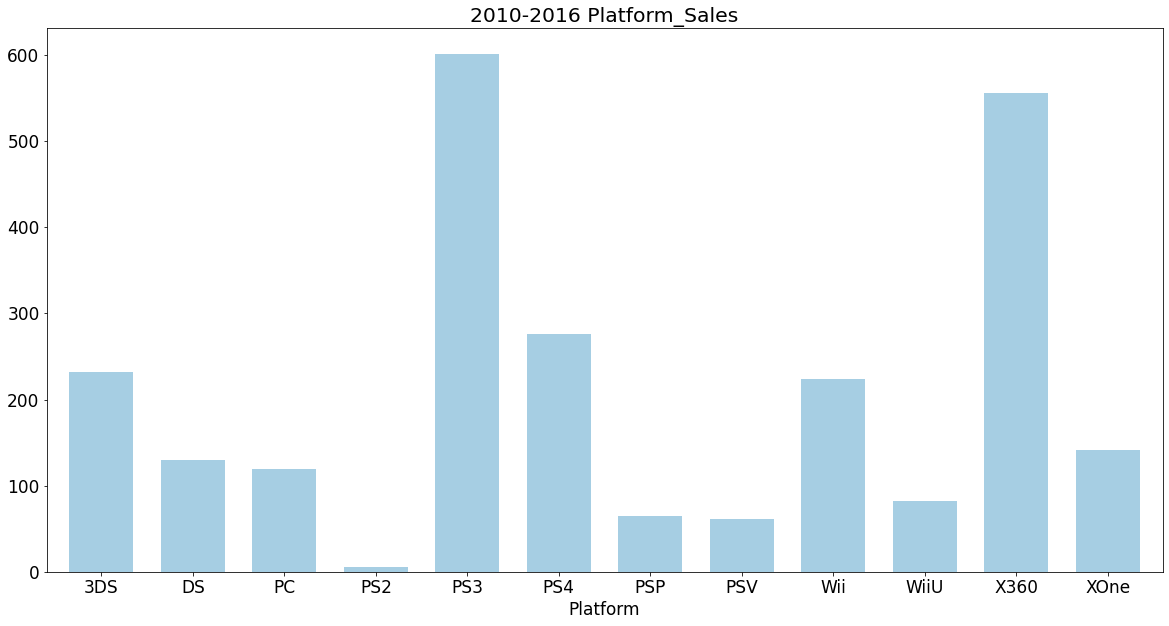

In [285]:
df_y10 = df_Y10.loc[df_Y10['Year']<=16]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2016 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

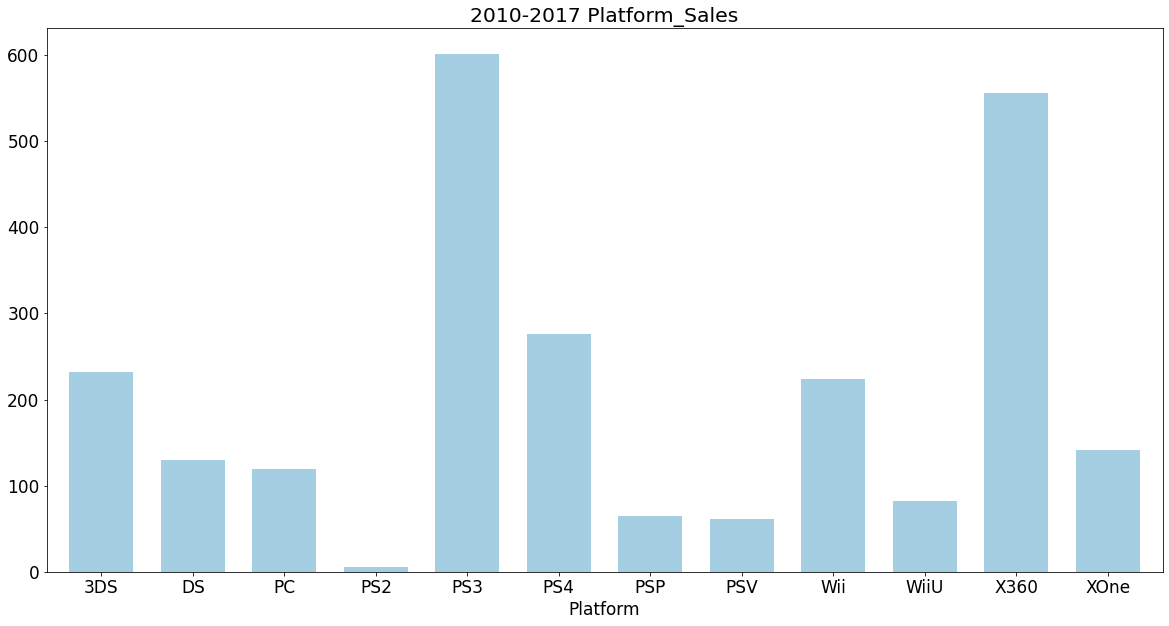

In [286]:
df_y10 = df_Y10.loc[df_Y10['Year']<=17]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2017 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

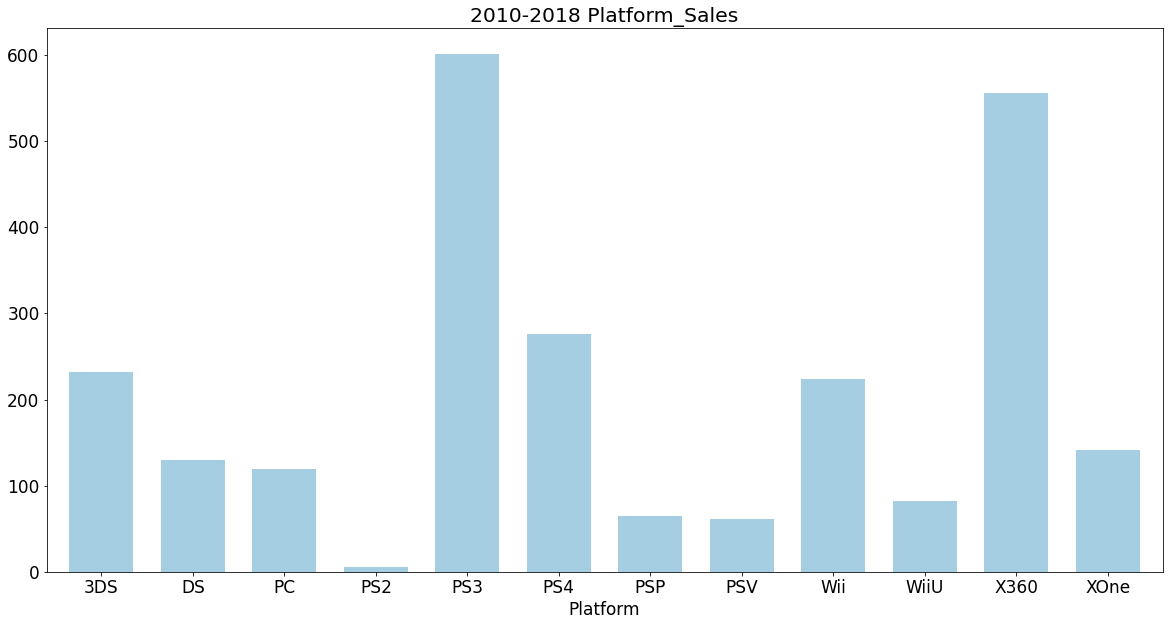

In [287]:
df_y10 = df_Y10.loc[df_Y10['Year']<=18]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2018 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

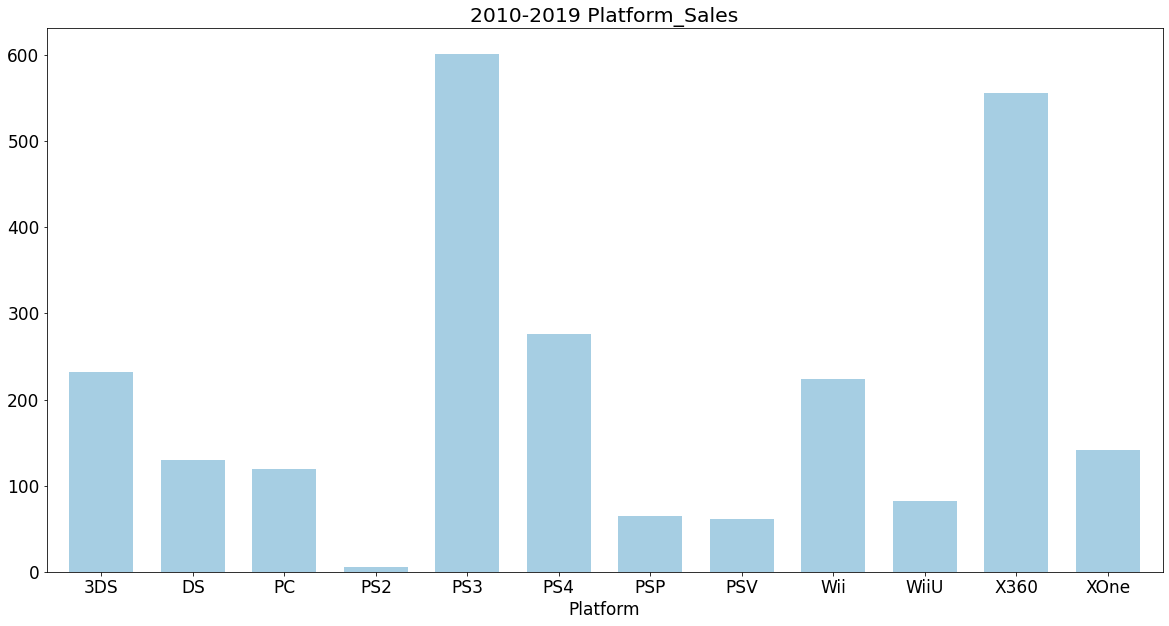

In [288]:
df_y10 = df_Y10.loc[df_Y10['Year']<=19]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2019 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

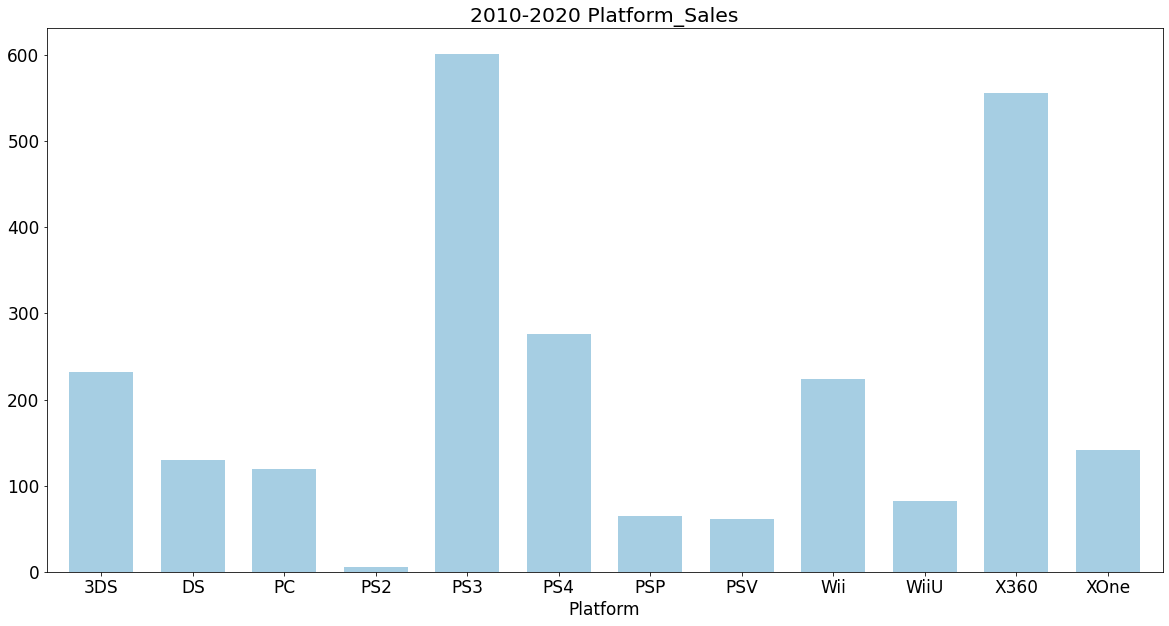

In [289]:
df_y10 = df_Y10.loc[df_Y10['Year']<=20]
NewGameP = df_y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2020 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

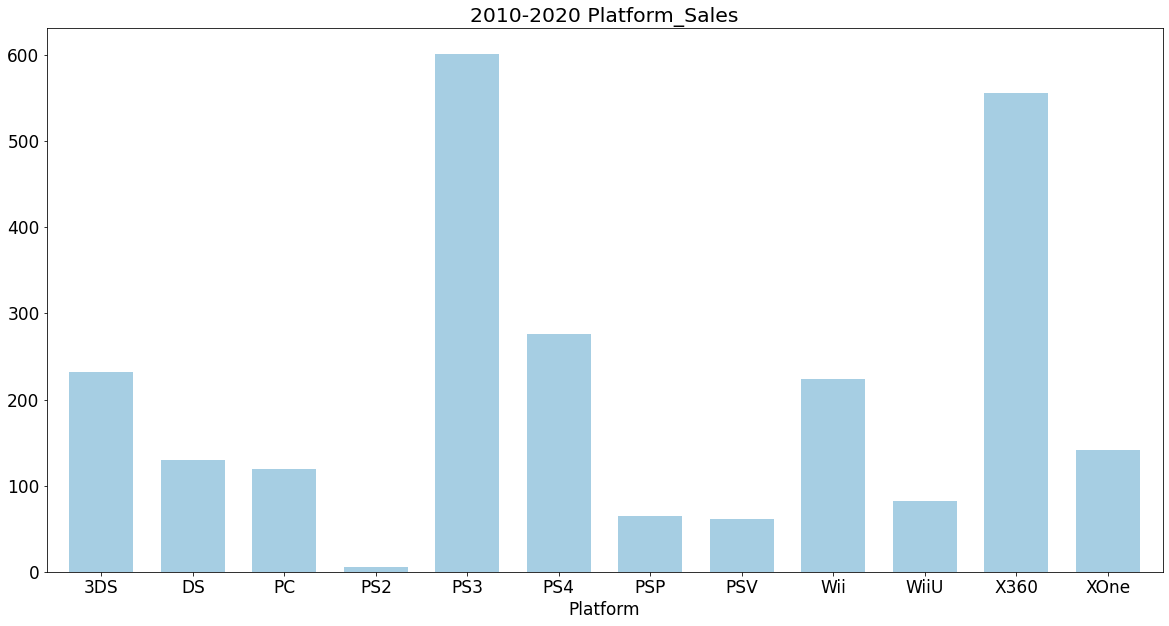

In [290]:
NewGameP = df_Y10.groupby(by=['Platform'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7)
plt.title('2010-2020 Platform_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

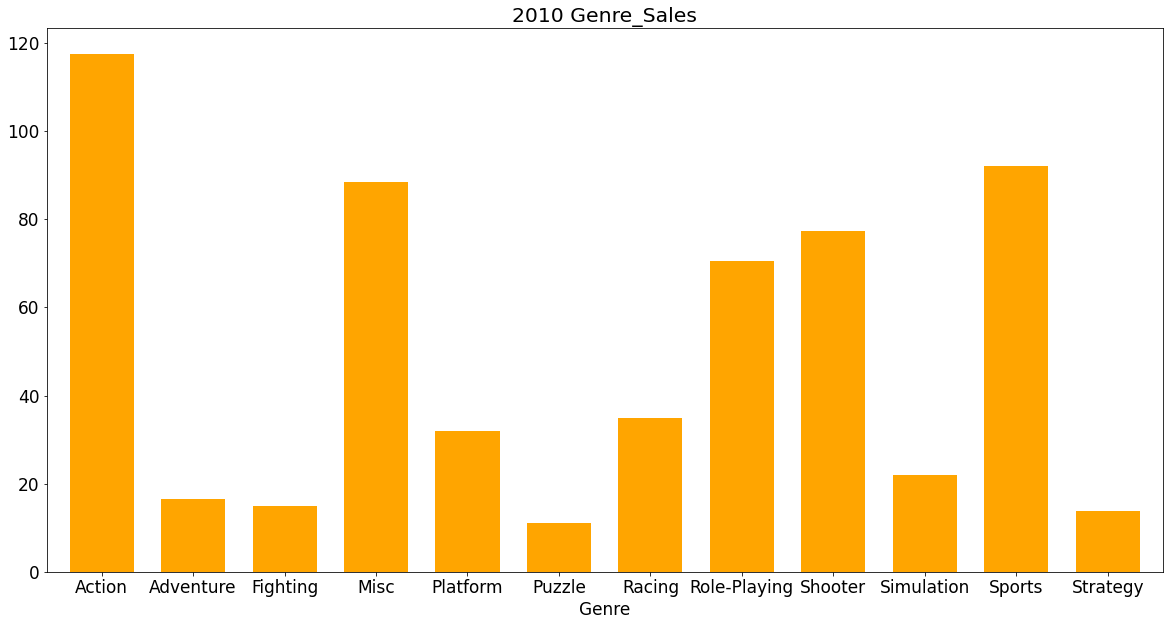

In [291]:
df_y10 = df_Y10.loc[df_Y10['Year']<=10]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

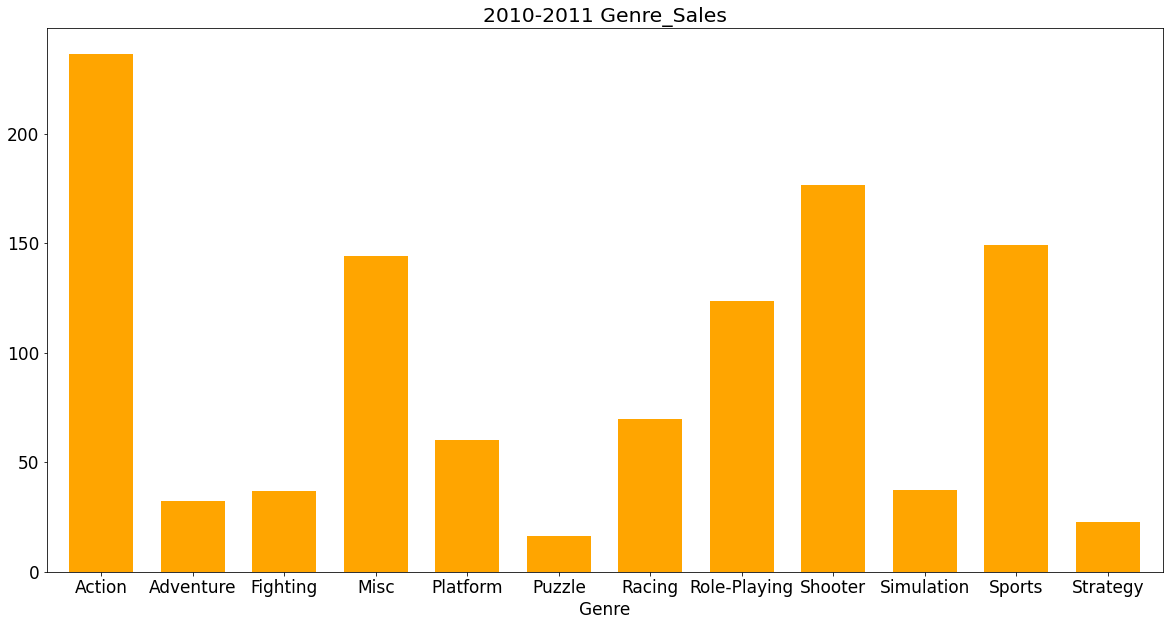

In [292]:
df_y10 = df_Y10.loc[df_Y10['Year']<=11]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2011 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

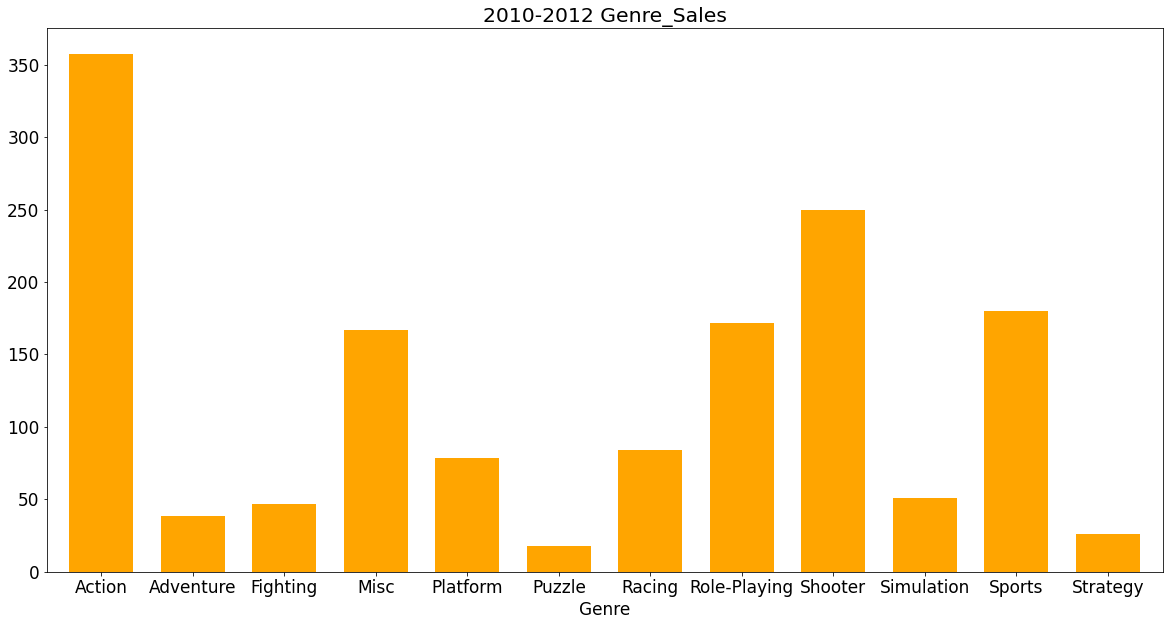

In [293]:
df_y10 = df_Y10.loc[df_Y10['Year']<=12]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2012 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

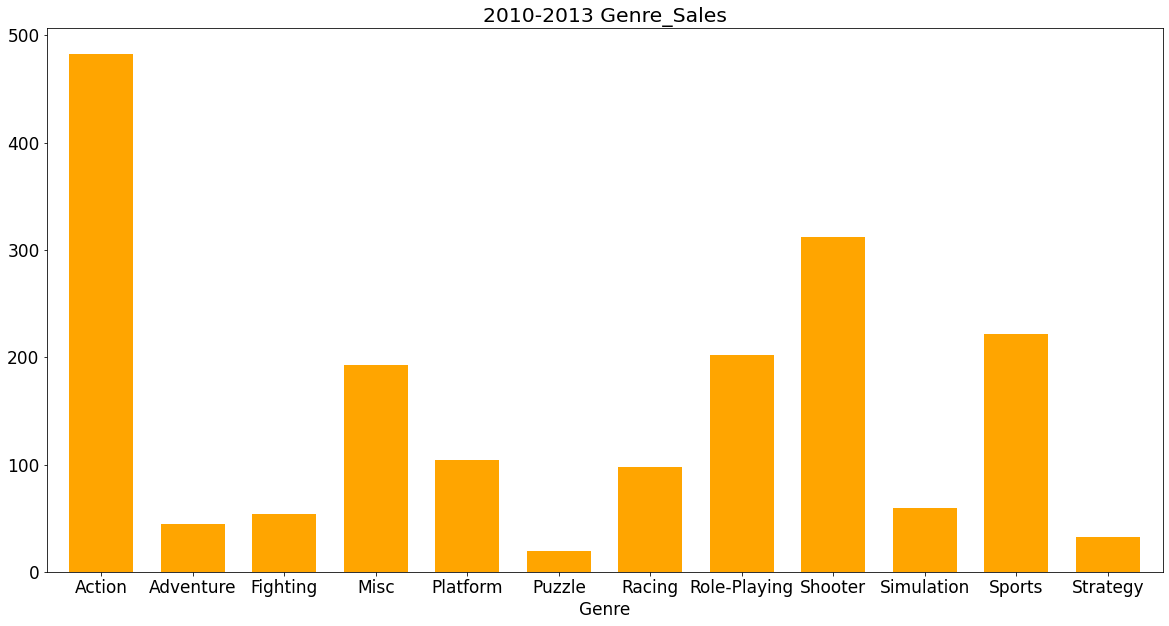

In [294]:
df_y10 = df_Y10.loc[df_Y10['Year']<=13]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2013 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

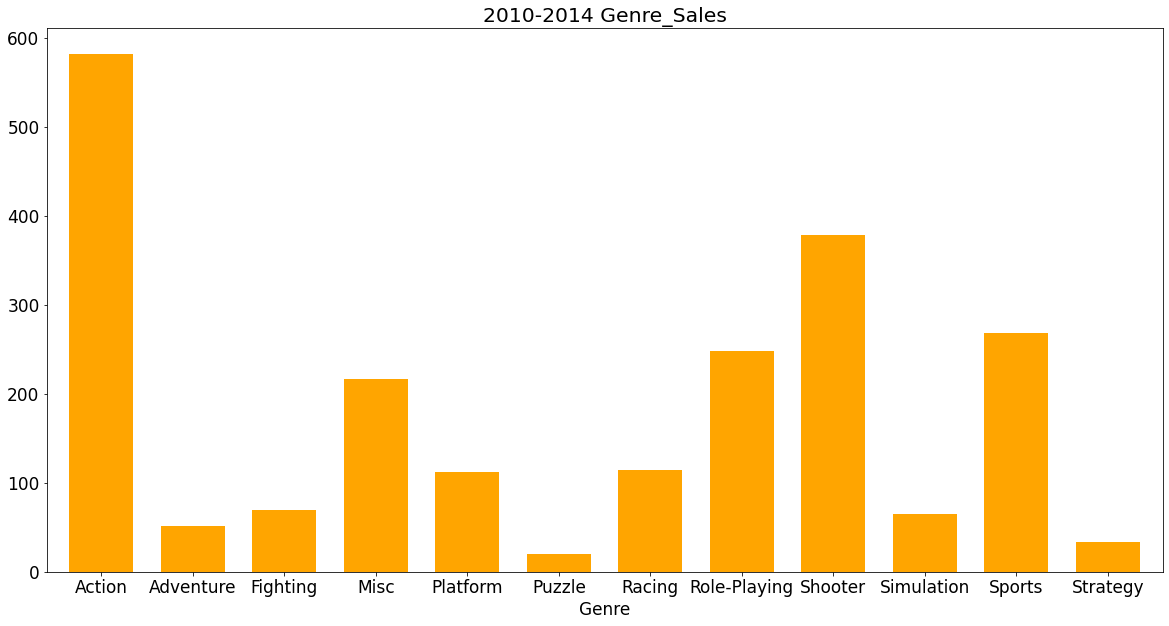

In [295]:
df_y10 = df_Y10.loc[df_Y10['Year']<=14]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2014 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

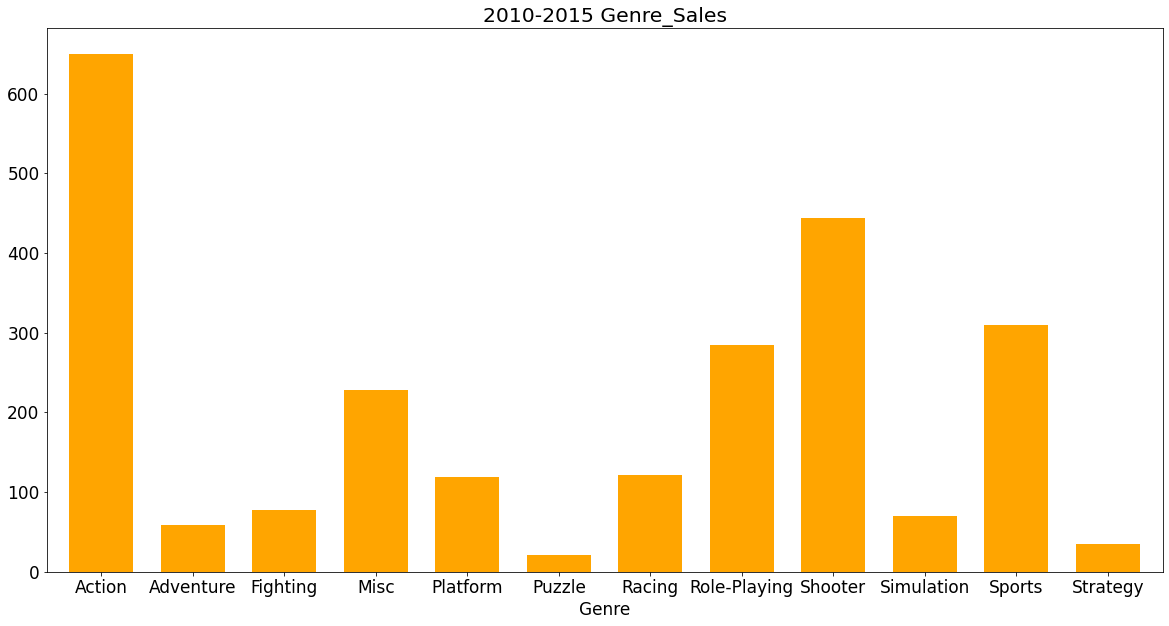

In [296]:
df_y10 = df_Y10.loc[df_Y10['Year']<=15]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2015 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

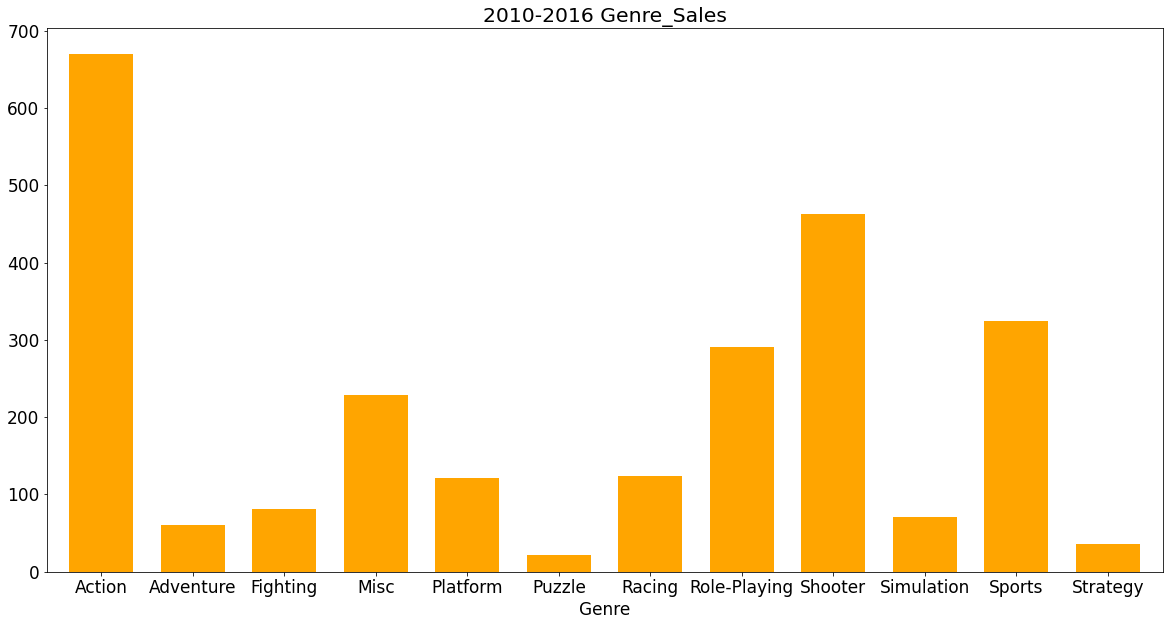

In [297]:
df_y10 = df_Y10.loc[df_Y10['Year']<=16]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2016 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

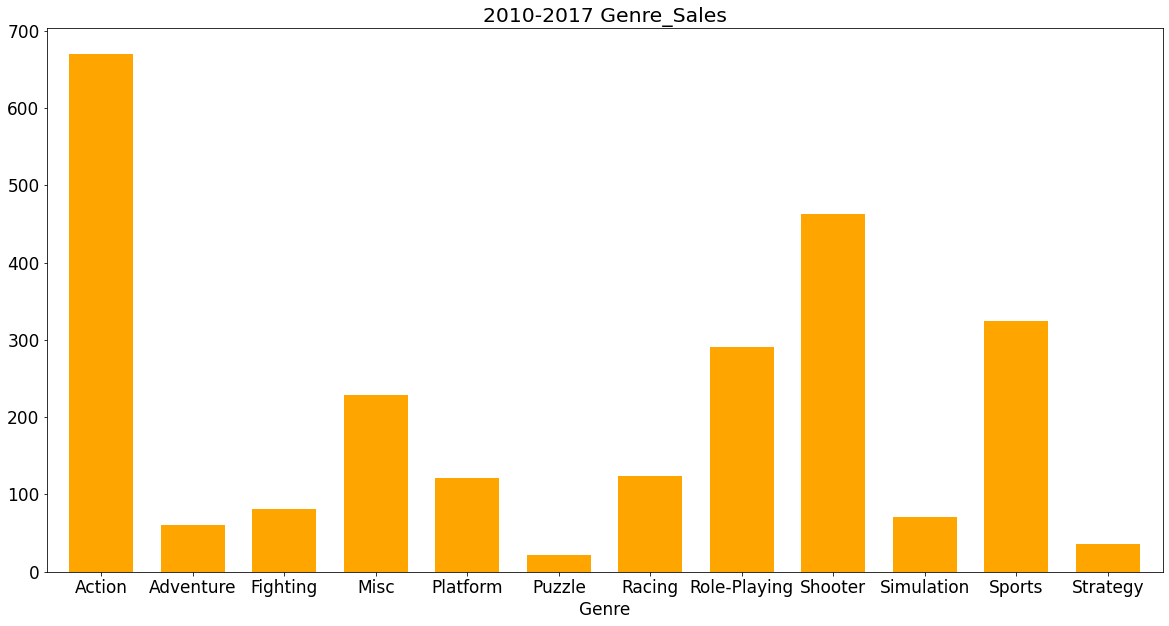

In [298]:
df_y10 = df_Y10.loc[df_Y10['Year']<=17]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2017 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

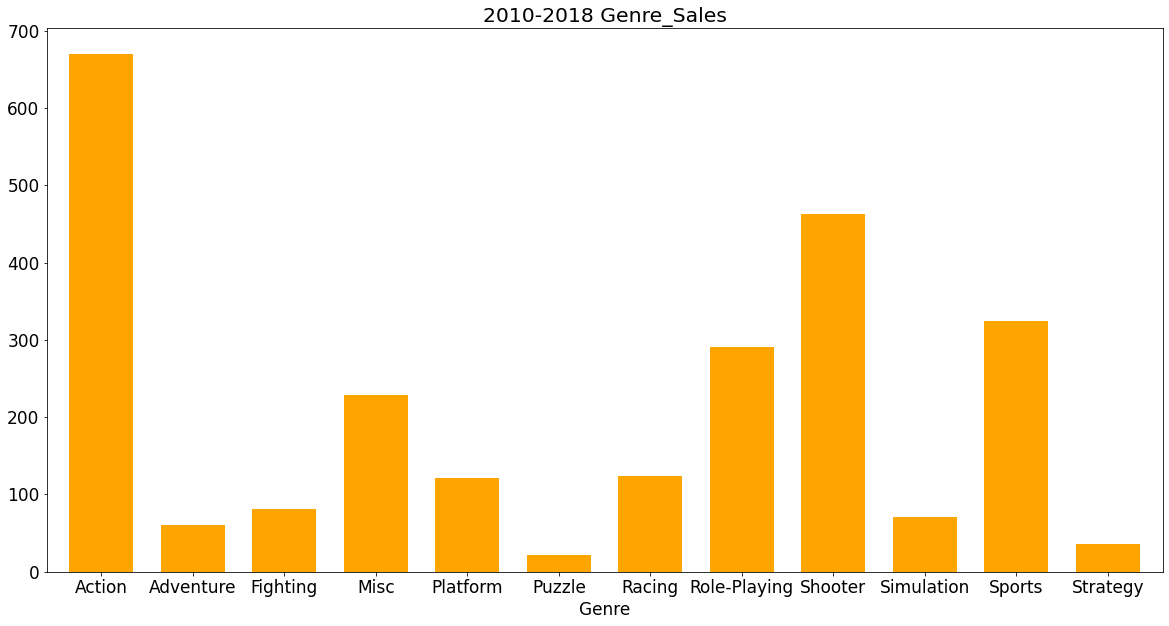

In [299]:
df_y10 = df_Y10.loc[df_Y10['Year']<=18]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2018 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

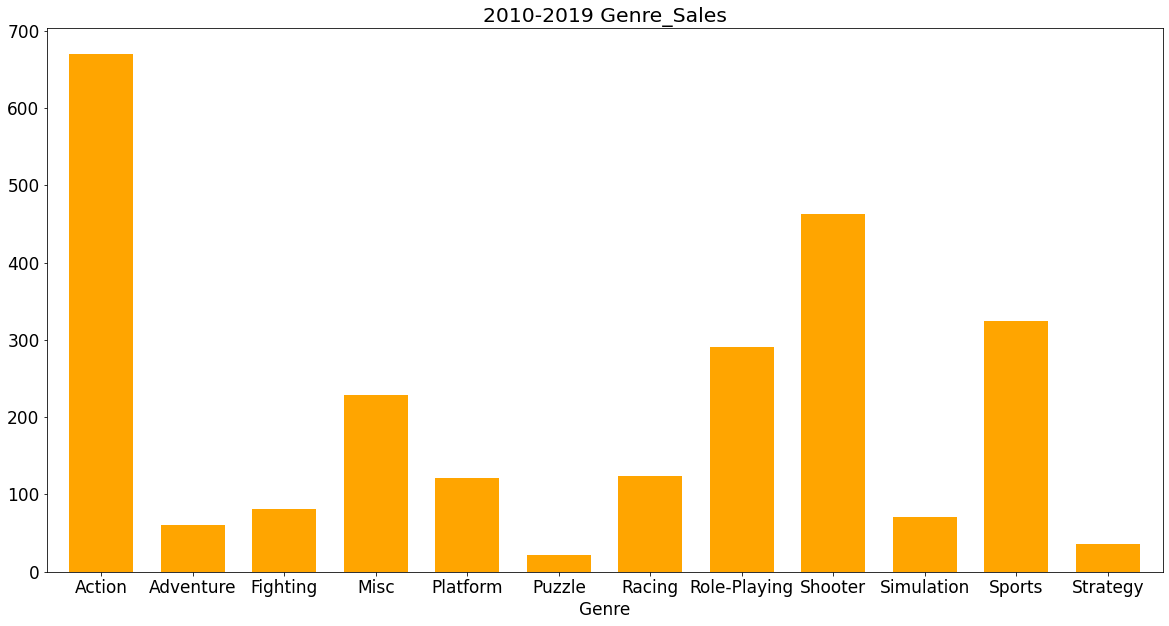

In [300]:
df_y10 = df_Y10.loc[df_Y10['Year']<=19]
NewGameP = df_y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameP.plot(kind='bar', width=0.7, color='orange')
plt.title('2010-2019 Genre_Sales')  
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

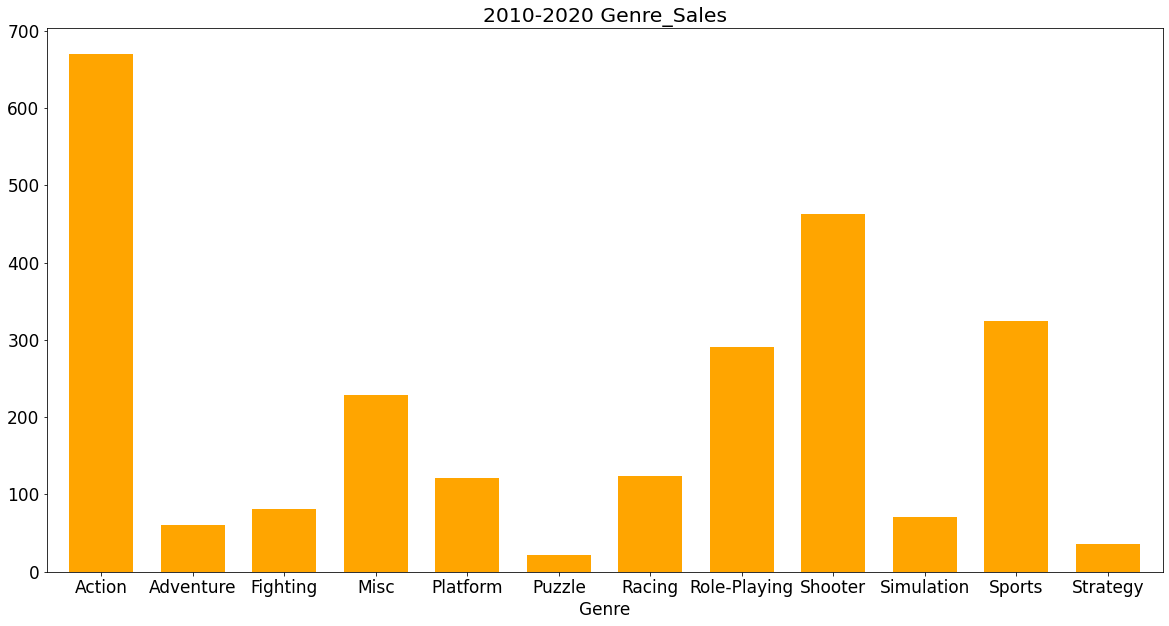

In [301]:
NewGameG = df_Y10.groupby(by=['Genre'], as_index = True)['Sales'].sum()
NewGameG.plot(kind='bar', width=0.7,color='orange')
plt.title('2010-2020 Genre_Sales')  
plt.xticks(rotation=0)

*   최근 10년동안 플랫폼, 장르들 누적 판매량 변화 그래프를 토대로
*   다음 분기에 모든 국가에서 좋은 실적을 얻기 위해서는
*   PS3, X360등의 플랫폼에서 할 수 있는
*   Action, Shooter, Sports 장르의 게임을 설계하면
*   좋은 실적을 얻을 수 있을것 이라고 기대합니다.
